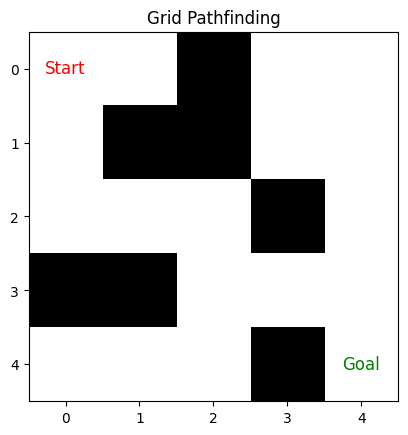

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the grid layout (0 = free space, 1 = obstacle)
grid = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

# Function to visualize the grid
def visualize_grid(grid, path=None):
    """Visualize the grid with optional path overlay."""
    plt.imshow(grid, cmap='binary', origin='upper')
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.title('Grid Pathfinding')

    # Mark start and goal points
    plt.text(0, 0, 'Start', ha='center', va='center', color='red', fontsize=12)
    plt.text(4, 4, 'Goal', ha='center', va='center', color='green', fontsize=12)

    # Overlay path if provided
    if path:
        for step in path:
            plt.plot(step[1], step[0], 'ro')
    plt.show()

# Display the grid
visualize_grid(grid)

In [2]:
# Define possible moves (Up, Down, Left, Right)
moves = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Generate a random population of move sequences
def generate_population(size, max_steps):
    """Generate random move sequences for the initial population."""
    return [np.random.randint(0, 4, max_steps).tolist() for _ in range(size)]

# Simulate a path based on a sequence of moves
def simulate_path(sequence):
    x, y = 0, 0  # Start at (0, 0)
    path = [(x, y)]  # Initialize the path
    for move in sequence:
        dx, dy = moves[move]  # Get direction of the move
        nx, ny = x + dx, y + dy  # Calculate new position
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == 0:
            x, y = nx, ny
            path.append((x, y))
        if (x, y) == (4, 4):
            break
    return path

# Calculate fitness based on proximity to the goal
def calculate_fitness(path):
    x, y = path[-1]  # Last position in the path
    distance = abs(x - 4) + abs(y - 4)
    return 1 / (1 + distance)

In [3]:
# Select parents using roulette wheel selection
def select_parents(population, fitness):
    # Calculate the total fitness of the population
    total_fitness = sum(fitness)

    # Compute the selection probabilities for each individual based on their fitness
    probabilities = [f / total_fitness for f in fitness]

    # Randomly select two parents using the computed probabilities
    indices = np.random.choice(len(population), size=2, p=probabilities)

    # Return the two selected parents
    return [population[indices[0]], population[indices[1]]]

# Perform crossover to combine parent genes
def crossover(parent1, parent2):
    # Randomly select a crossover point within the length of the parent's sequence
    point = np.random.randint(1, len(parent1))

    # Create the first child by combining the first part of parent1 and the second part of parent2
    child1 = parent1[:point] + parent2[point:]

    # Create the second child by combining the first part of parent2 and the second part of parent1
    child2 = parent2[:point] + parent1[point:]

    # Return the two offspring
    return child1, child2

# Mutate a sequence by changing random moves
def mutate(sequence, mutation_rate):
    # Iterate through each move in the sequence
    for i in range(len(sequence)):
        # Apply mutation based on the mutation rate
        if np.random.rand() < mutation_rate:
            # Replace the current move with a random new move
            sequence[i] = np.random.randint(0, 4)

    # Return the mutated sequence
    return sequence


Generation 1, Best Fitness: 0.2000


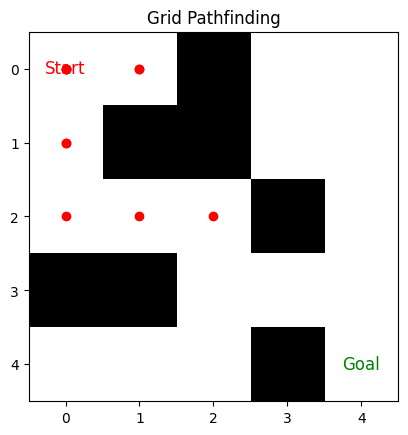

Generation 2, Best Fitness: 0.2000


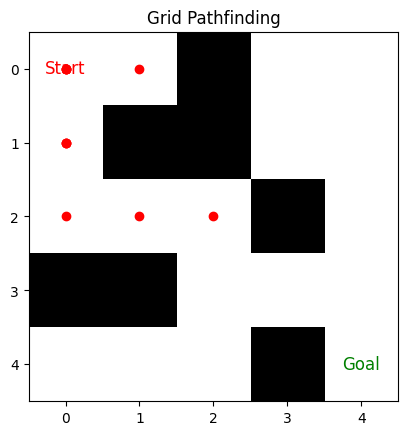

Generation 3, Best Fitness: 0.2500


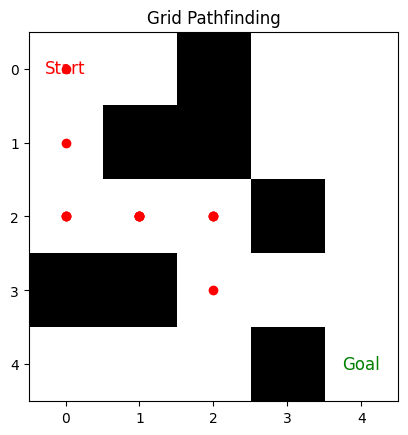

Generation 4, Best Fitness: 0.2000


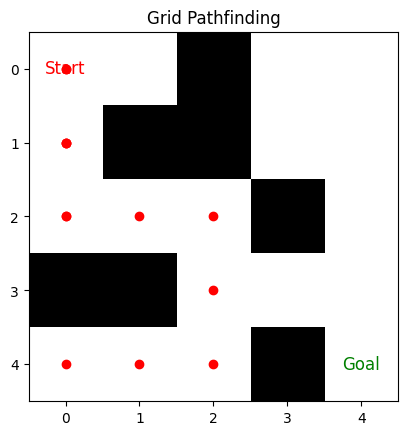

Generation 5, Best Fitness: 0.2000


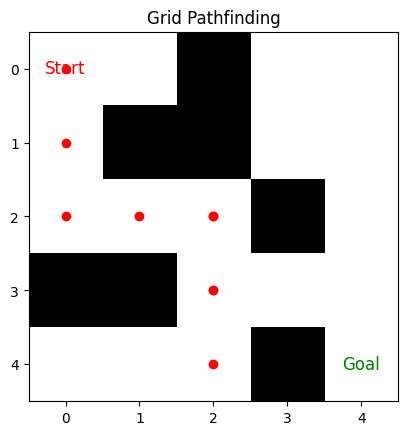

Generation 6, Best Fitness: 0.1667


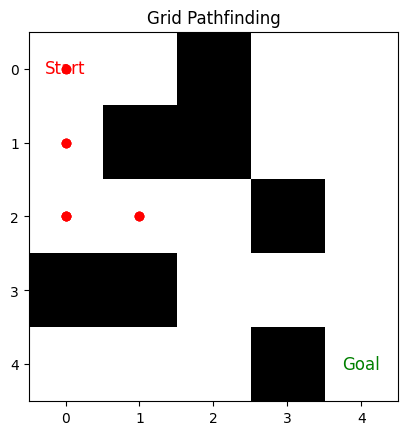

Generation 7, Best Fitness: 0.2500


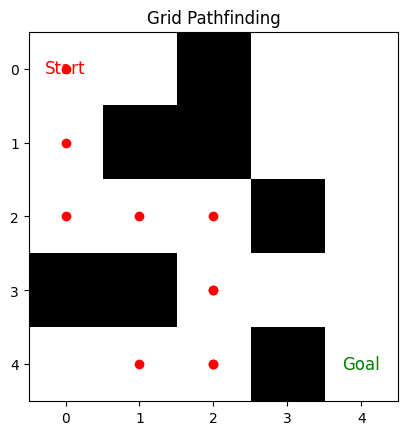

Generation 8, Best Fitness: 0.1667


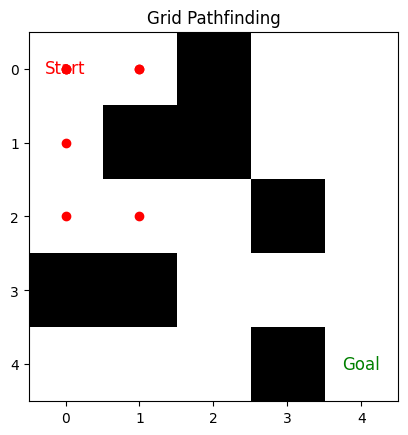

Generation 9, Best Fitness: 0.1667


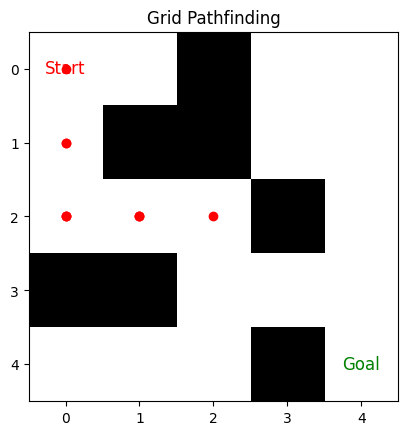

Generation 10, Best Fitness: 0.1429


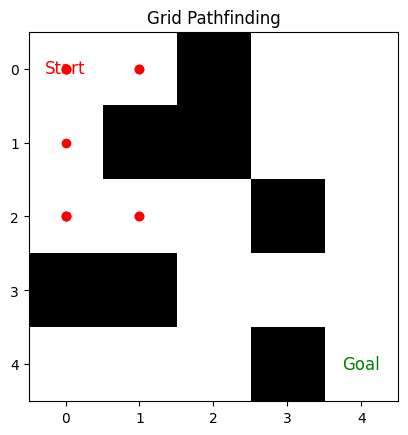

Generation 11, Best Fitness: 0.1250


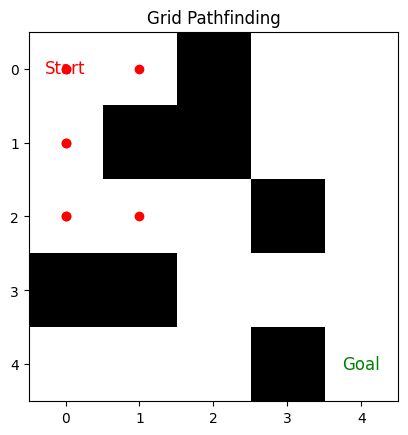

Generation 12, Best Fitness: 0.1250


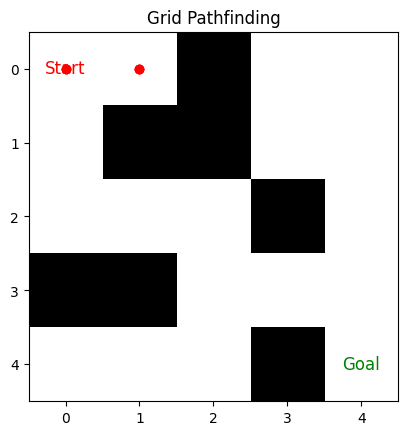

Generation 13, Best Fitness: 0.1667


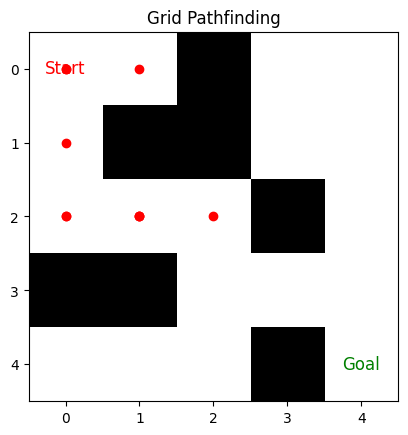

Generation 14, Best Fitness: 0.1429


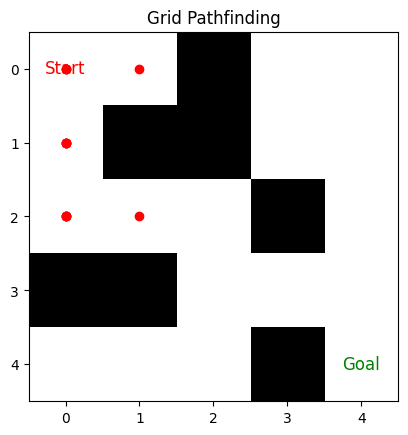

Generation 15, Best Fitness: 0.1667


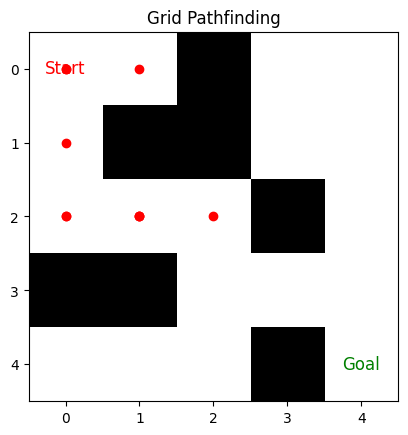

Generation 16, Best Fitness: 0.1667


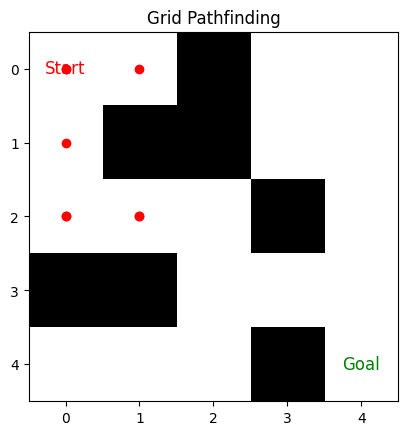

Generation 17, Best Fitness: 0.1667


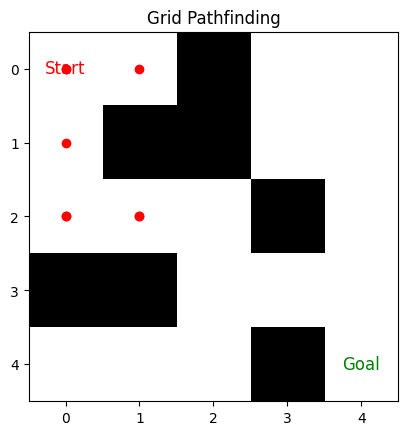

Generation 18, Best Fitness: 0.1429


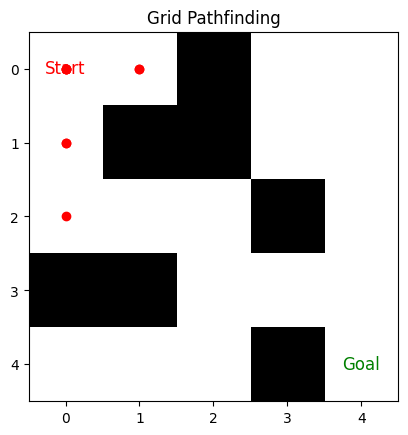

Generation 19, Best Fitness: 0.1250


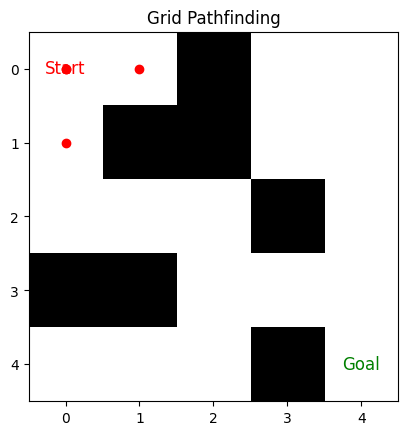

Generation 20, Best Fitness: 0.1250


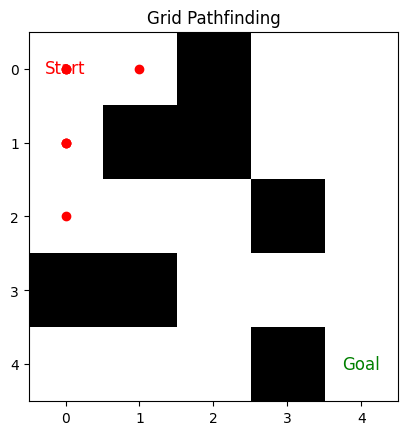

Generation 21, Best Fitness: 0.1667


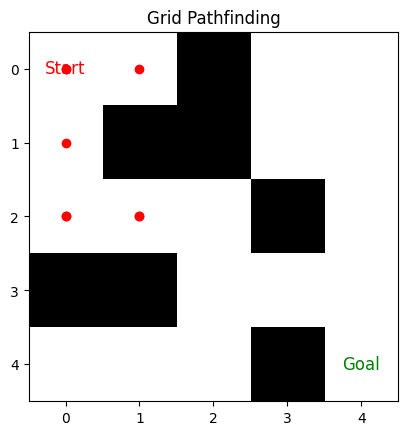

Generation 22, Best Fitness: 0.1667


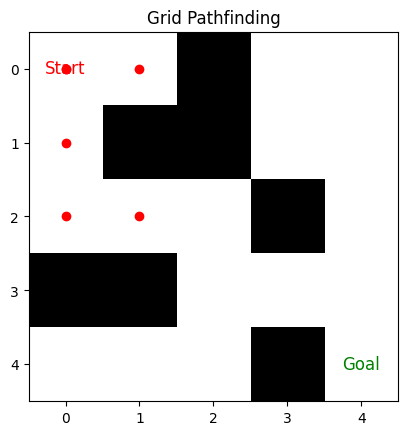

Generation 23, Best Fitness: 0.1667


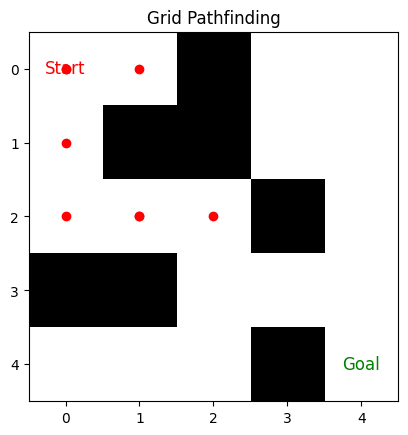

Generation 24, Best Fitness: 0.2000


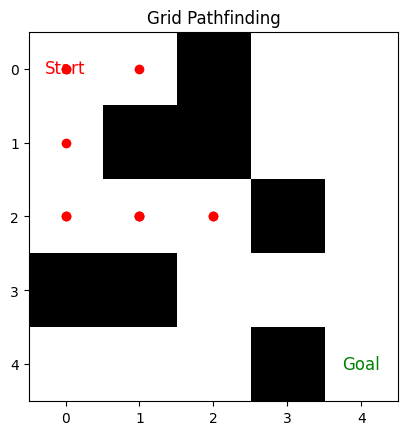

Generation 25, Best Fitness: 0.1667


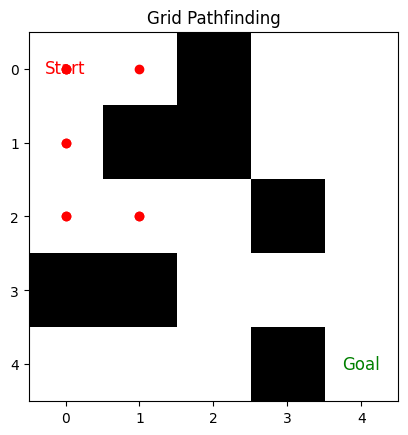

Generation 26, Best Fitness: 0.1667


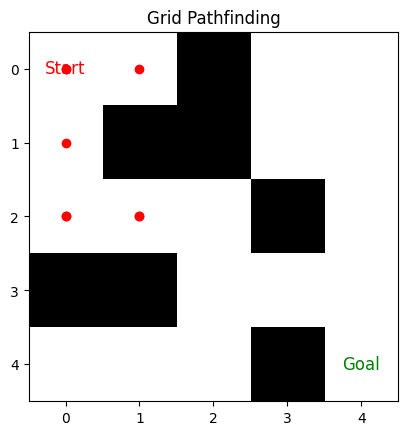

Generation 27, Best Fitness: 0.1667


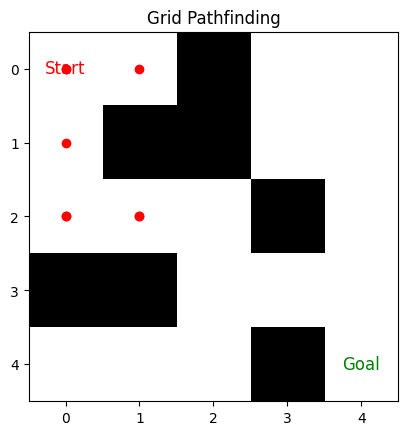

Generation 28, Best Fitness: 0.2000


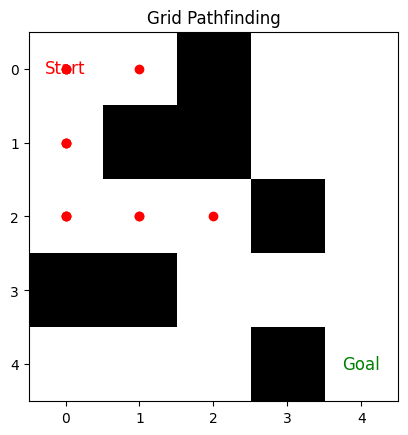

Generation 29, Best Fitness: 0.2000


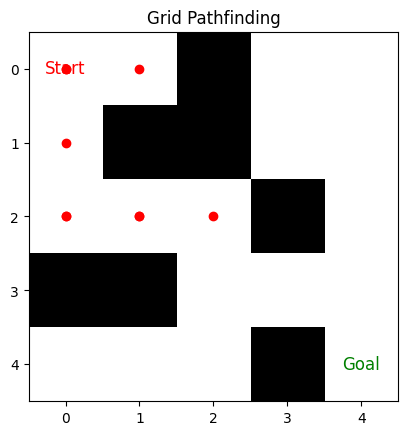

Generation 30, Best Fitness: 0.3333


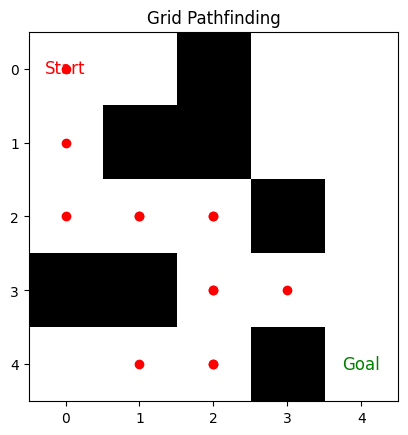

Generation 31, Best Fitness: 0.3333


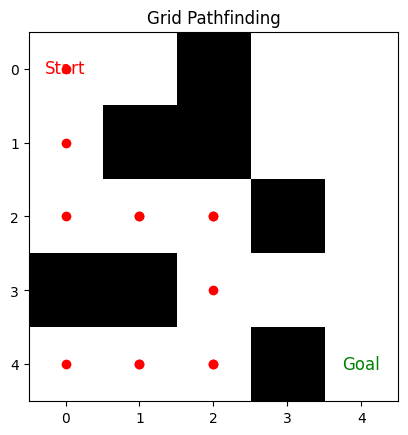

Generation 32, Best Fitness: 0.3333


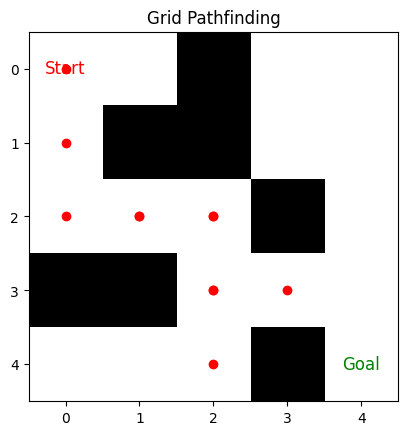

Generation 33, Best Fitness: 0.3333


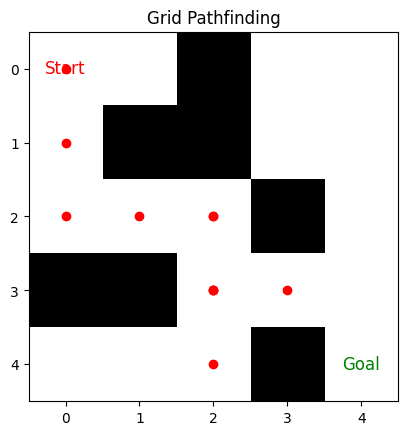

Generation 34, Best Fitness: 0.2000


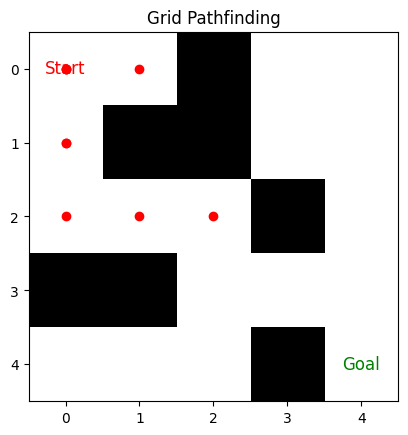

Generation 35, Best Fitness: 0.2000


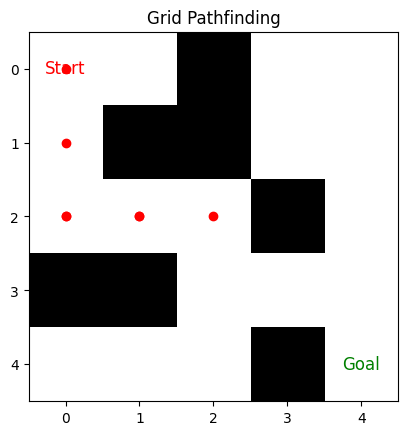

Generation 36, Best Fitness: 0.2000


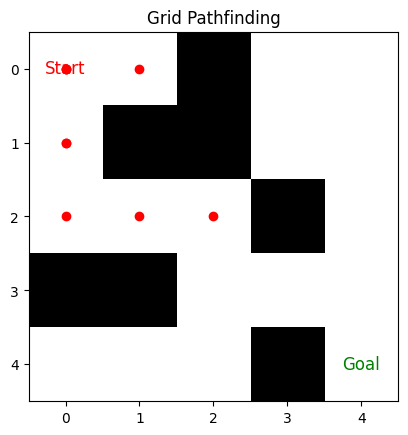

Generation 37, Best Fitness: 1.0000


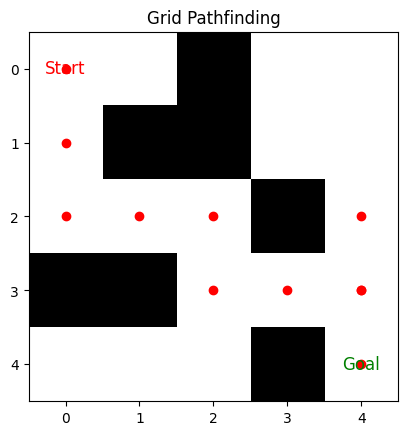

Generation 38, Best Fitness: 1.0000


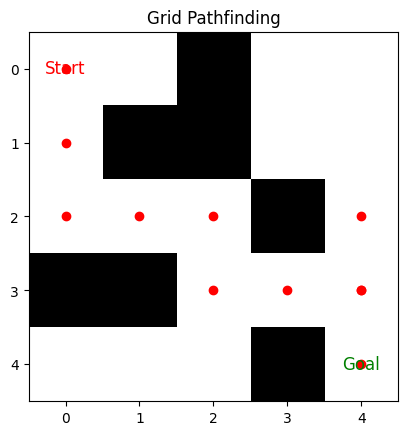

Generation 39, Best Fitness: 0.3333


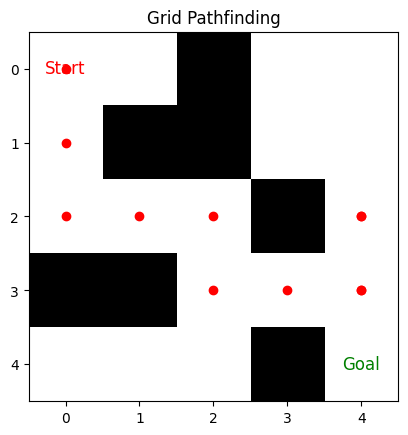

Generation 40, Best Fitness: 0.5000


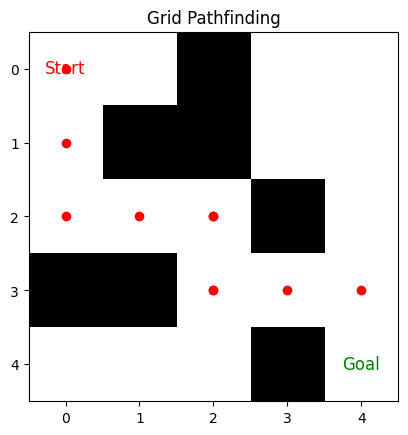

Generation 41, Best Fitness: 1.0000


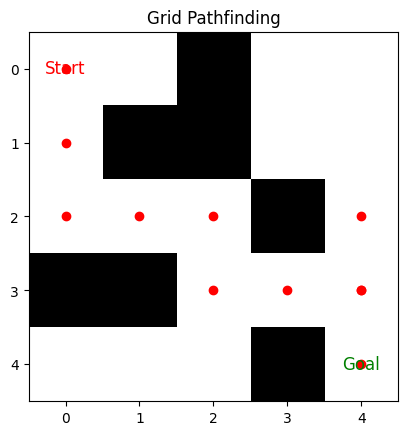

Generation 42, Best Fitness: 1.0000


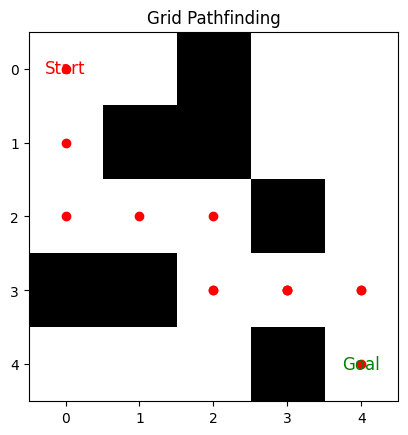

Generation 43, Best Fitness: 1.0000


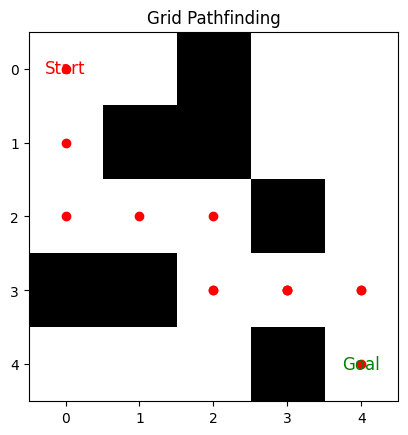

Generation 44, Best Fitness: 1.0000


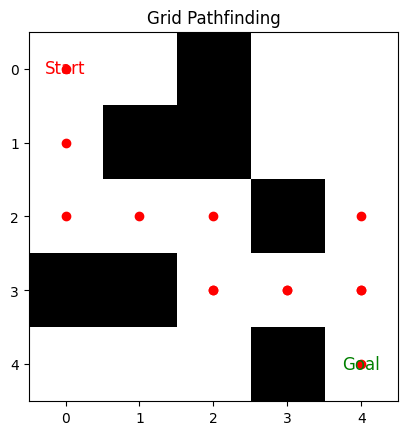

Generation 45, Best Fitness: 1.0000


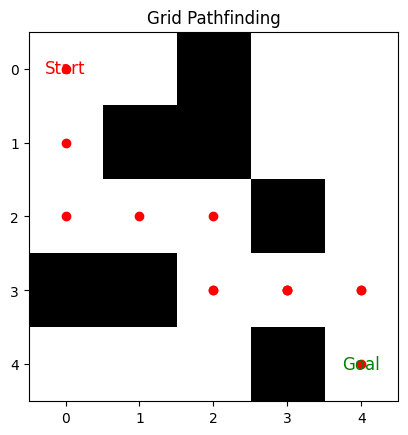

Generation 46, Best Fitness: 1.0000


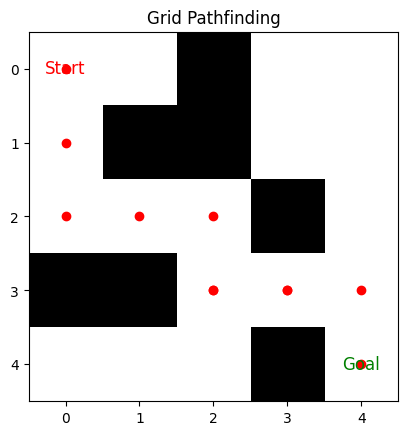

Generation 47, Best Fitness: 1.0000


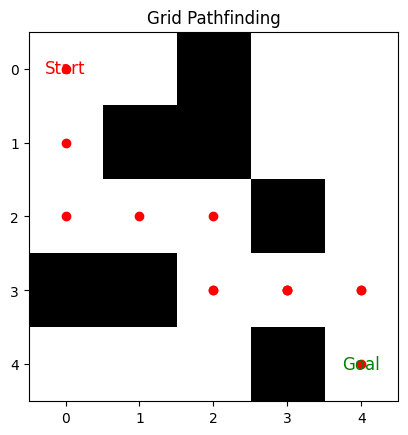

Generation 48, Best Fitness: 1.0000


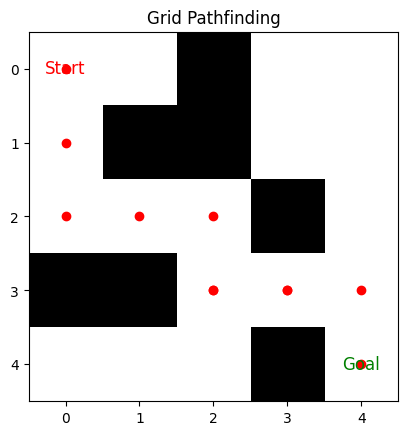

Generation 49, Best Fitness: 1.0000


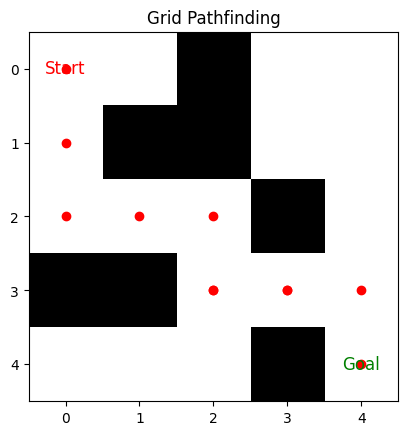

Generation 50, Best Fitness: 1.0000


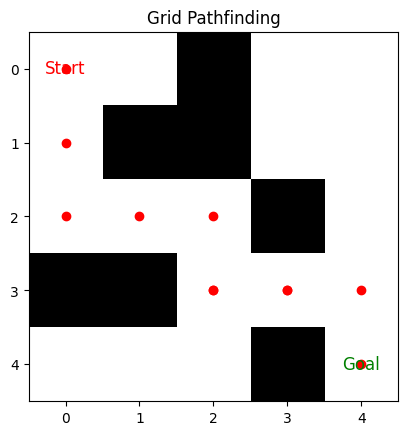

Best Path Found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 2), (3, 3), (3, 4), (4, 4)]


In [4]:
# Parameters for the Genetic Algorithm
population_size = 10  # Number of solutions in the population
max_steps = 20  # Maximum number of moves in a sequence
generations = 50  # Number of generations to evolve the solutions
mutation_rate = 0.1  # Probability of mutation for each move in a sequence

# Initialize population
population = generate_population(population_size, max_steps)  # Create an initial population of random solutions
best_fitness_per_generation = []  # List to store the best fitness value in each generation
best_path = None  # Variable to store the best path found during the evolution

# Run the Genetic Algorithm
for generation in range(generations):  # Loop through each generation
    paths = [simulate_path(seq) for seq in population]  # Simulate paths for all sequences in the population
    fitness = [calculate_fitness(path) for path in paths]  # Calculate the fitness values for all paths
    best_fitness = max(fitness)  # Find the highest fitness value in the current generation
    best_fitness_per_generation.append(best_fitness)  # Append the best fitness to the list
    best_path = paths[np.argmax(fitness)]  # Get the path corresponding to the best fitness value

    new_population = []  # Initialize a new population for the next generation
    while len(new_population) < population_size:  # Ensure the new population has the required size
        parents = select_parents(population, fitness)  # Select two parent solutions based on fitness
        offspring = crossover(parents[0], parents[1])  # Perform crossover to generate offspring
        new_population.append(mutate(offspring[0], mutation_rate))  # Apply mutation to the first child
        new_population.append(mutate(offspring[1], mutation_rate))  # Apply mutation to the second child
    population = new_population[:population_size]  # Update the population to the new generation

    # Print the best fitness value for the current generation and visualize the best path
    print(f"Generation {generation + 1}, Best Fitness: {best_fitness:.4f}")
    visualize_grid(grid, path=best_path)  # Show the grid with the current best path

# Print the best path found after all generations
print("Best Path Found:", best_path)

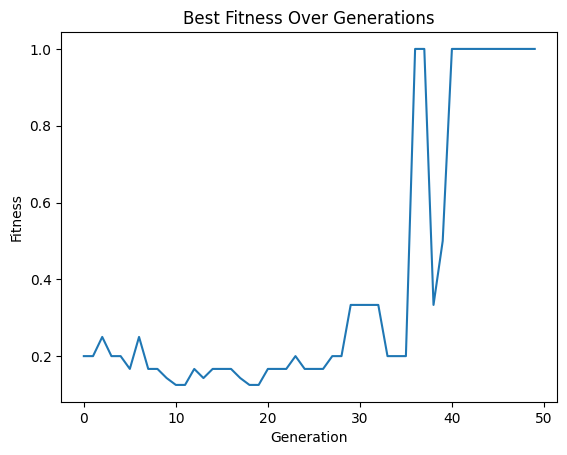

In [5]:
# Plot the best fitness over generations
plt.plot(best_fitness_per_generation)
plt.title("Best Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()